<a href="https://colab.research.google.com/github/beingwahid/beingwahid/blob/main/fakenews_Word2vec1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import numpy as np
from nltk.stem import PorterStemmer

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/"My Drive"/train.zip

Archive:  gdrive/My Drive/train.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
data=pd.read_csv("train.csv")

In [ ]:
data.shape

(20800, 5)

In [ ]:
data= data.dropna()

In [ ]:
data.shape

(18285, 5)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data=data.iloc[:,2:]

In [ ]:
data.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
## Get the Independent Features

X=data.loc[:,["title"]]

In [ ]:
## Get the Dependent features
y=data['label']

In [ ]:
X.shape

(18285, 1)

In [ ]:
y.shape

(18285,)

In [ ]:
#lowering the text
data["title"]=data["title"].apply(lambda x: x.lower())

In [ ]:
#cleaning the text
data["title"]=data.title.str.replace('[^a-zA-Z ]', '')

In [ ]:
#Stemming
ps = PorterStemmer()
data['title'] = data['title'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [ ]:
corpus = []
for i in range(0, len(data["title"])):
  corpus.append(data["title"][i])

In [ ]:
corpus

['hous dem aid we didnt even see comey letter until jason chaffetz tweet it',
 'flynn hillari clinton big woman on campu breitbart',
 'whi the truth might get you fire',
 'civilian kill in singl us airstrik have been identifi',
 'iranian woman jail for fiction unpublish stori about woman stone to death for adulteri',
 'jacki mason hollywood would love trump if he bomb north korea over lack of tran bathroom exclus video breitbart',
 'benot hamon win french socialist parti presidenti nomin the new york time',
 'a backchannel plan for ukrain and russia courtesi of trump associ the new york time',
 'obama organ for action partner with soroslink indivis to disrupt trump agenda',
 'bbc comedi sketch real housew of isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter in the arctic photo',
 'us offici see no link between trump and russia',
 're ye there are paid govern troll on social media blog forum and websit',
 'in major leagu soccer argentin find a home and

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data["title"], data['label'],test_size = 0.05, random_state = 98)

In [ ]:
pip install gensim

In [ ]:
from gensim.models import Word2Vec

Embedding_dimensions = 200
type(X_train)
#Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [ ]:
Word2vec_train_data

[['presidentelect',
  'trump',
  'invit',
  'an',
  'excit',
  'isra',
  'prime',
  'minist',
  'benjamin',
  'netanyahu',
  'to',
  'come',
  'visit'],
 ['a',
  'rare',
  'pacif',
  'island',
  'captiv',
  'it',
  'neighborhood',
  'the',
  'new',
  'york',
  'time'],
 ['on',
  'dr',
  'oz',
  'trump',
  'offer',
  'placebo',
  'transpar',
  'the',
  'new',
  'york',
  'time'],
 ['obama',
  'say',
  'he',
  'would',
  'have',
  'defeat',
  'trump',
  'for',
  'a',
  'third',
  'term',
  'the',
  'new',
  'york',
  'time'],
 ['senat',
  'confirm',
  'scott',
  'pruitt',
  'to',
  'lead',
  'trump',
  'epa',
  'despit',
  'dem',
  'delay',
  'tactic',
  'breitbart'],
 ['chaiwali',
  'an',
  'indian',
  'restaur',
  'that',
  'feel',
  'like',
  'home',
  'the',
  'new',
  'york',
  'time'],
 ['we',
  'need',
  'a',
  'miracl',
  'on',
  'th',
  'street',
  'the',
  'new',
  'york',
  'time'],
 ['bill',
  'cunningham',
  'look',
  'for',
  'subject',
  'and',
  'they',
  'look',
  'for',

In [ ]:
word2vec_model = Word2Vec(Word2vec_train_data,
                 size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.vocab))

Vocabulary Length: 4154


In [ ]:
input_length = 200
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(corpus)

vocab_length = len(tokenizer.word_index) + 1
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 15241


In [ ]:
 len(tokenizer.word_index)

15240

In [ ]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

X_train.shape: (17370, 200)
X_test.shape : (915, 200)


In [ ]:
from gensim.models import KeyedVectors

In [ ]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))
for word, token in tokenizer.word_index.items():
  if word2vec_model.wv.__contains__(word):
      embedding_matrix[token] = word2vec_model.wv.__getitem__(word)
print("Embedding Matrix Shape:", embedding_matrix.shape)     


Embedding Matrix Shape: (15241, 200)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding , SimpleRNN

In [ ]:
embedding_layer = Embedding(input_dim = vocab_length, 
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix], 
                                input_length=input_length,
                                trainable=False)
modela = Sequential()
modela.add(embedding_layer)
modela.add(Bidirectional(LSTM(256)))
modela.add(Dense(1, activation='sigmoid'))
modela.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

In [ ]:
modela.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          3048200   
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               935936    
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 3,984,649
Trainable params: 936,449
Non-trainable params: 3,048,200
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [ ]:
a = modela.fit(X_train, y_train, batch_size=128, epochs=10,verbose=1, validation_split=0.2,callbacks=callbacks)

Epoch 1/10
109/109 [==============================] - 24s 184ms/step - loss: 0.3896 - accuracy: 0.8051 - val_loss: 0.3004 - val_accuracy: 0.8817
Epoch 2/10
109/109 [==============================] - 19s 175ms/step - loss: 0.2905 - accuracy: 0.8777 - val_loss: 0.2465 - val_accuracy: 0.8946
Epoch 3/10
109/109 [==============================] - 19s 175ms/step - loss: 0.2544 - accuracy: 0.8886 - val_loss: 0.2286 - val_accuracy: 0.8978
Epoch 4/10
109/109 [==============================] - 19s 175ms/step - loss: 0.2405 - accuracy: 0.8916 - val_loss: 0.2235 - val_accuracy: 0.9004
Epoch 5/10
109/109 [==============================] - 19s 175ms/step - loss: 0.2353 - accuracy: 0.8920 - val_loss: 0.2156 - val_accuracy: 0.9007
Epoch 6/10
109/109 [==============================] - 19s 176ms/step - loss: 0.2285 - accuracy: 0.8966 - val_loss: 0.2147 - val_accuracy: 0.9018
Epoch 7/10
109/109 [==============================] - 19s 175ms/step - loss: 0.2288 - accuracy: 0.8943 - val_loss: 0.2240 - val_ac

In [ ]:
bi_pred=(modela.predict(X_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,bi_pred)
acc

0.9005464480874317

In [ ]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,bi_pred)
con

array([[435,  81],
       [ 10, 389]])

In [ ]:
a.history

{'accuracy': [0.8051238059997559,
  0.8777346014976501,
  0.8886010646820068,
  0.8916234970092773,
  0.8919833302497864,
  0.896588921546936,
  0.8942860960960388,
  0.8968048095703125,
  0.8983160853385925,
  0.8996833562850952],
 'loss': [0.3895561695098877,
  0.2905440032482147,
  0.2543882131576538,
  0.24053014814853668,
  0.23534050583839417,
  0.22854164242744446,
  0.2287510484457016,
  0.22097551822662354,
  0.22023111581802368,
  0.2176063507795334],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'val_accuracy': [0.8816925883293152,
  0.8946459293365479,
  0.8978123068809509,
  0.9004030227661133,
  0.9006908535957336,
  0.9018422365188599,
  0.9015544056892395,
  0.900978684425354,
  0.9047207832336426,
  0.9035694003105164],
 'val_loss': [0.3004164695739746,
  0.24654050171375275,
  0.22855065762996674,
  0.22348536550998688,
  0.2155725210905075,
  0.21467432379722595,
  0.22404690086841583,
  0.21184368431568146,
  0.20991042256355286,
  

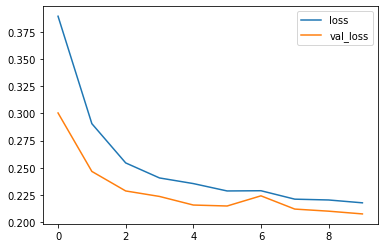

In [ ]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(a.history['loss'], label='loss')
plt.plot(a.history['val_loss'], label = 'val_loss')
plt.legend()


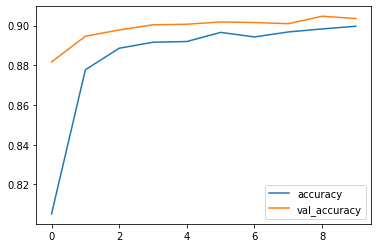

In [ ]:
# plotting the accuracy and validation accuracy of the model
plt.plot(a.history['accuracy'], label= 'accuracy')
plt.plot(a.history['val_accuracy'], label='val_accuracy')
plt.legend()


In [ ]:
from sklearn.metrics import classification_report
print(print(classification_report(y_test,bi_pred,target_names=['real','fake'])))

              precision    recall  f1-score   support

        real       0.98      0.84      0.91       516
        fake       0.83      0.97      0.90       399

    accuracy                           0.90       915
   macro avg       0.90      0.91      0.90       915
weighted avg       0.91      0.90      0.90       915

None


In [ ]:
embedding_layer = Embedding(input_dim = vocab_length, 
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix], 
                                input_length=input_length,
                                trainable=False)
modelb = Sequential()
modelb.add(embedding_layer)
modelb.add(SimpleRNN(128))
modelb.add(Dense(1, activation='sigmoid'))
modelb.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
modelb.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 200)          3048200   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               42112     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,090,441
Trainable params: 42,241
Non-trainable params: 3,048,200
_________________________________________________________________


In [ ]:
b= modelb.fit(X_train, y_train, batch_size=64, epochs=10,callbacks=callbacks,verbose=1, validation_split=0.2)

Epoch 1/10
218/218 [==============================] - 48s 217ms/step - loss: 0.3528 - accuracy: 0.8431 - val_loss: 0.2837 - val_accuracy: 0.8742
Epoch 2/10
218/218 [==============================] - 47s 216ms/step - loss: 0.2772 - accuracy: 0.8858 - val_loss: 0.2516 - val_accuracy: 0.8993
Epoch 3/10
218/218 [==============================] - 46s 211ms/step - loss: 0.2559 - accuracy: 0.8883 - val_loss: 0.2357 - val_accuracy: 0.8926
Epoch 4/10
218/218 [==============================] - 46s 211ms/step - loss: 0.2496 - accuracy: 0.8914 - val_loss: 0.2728 - val_accuracy: 0.8955
Epoch 5/10
218/218 [==============================] - 46s 213ms/step - loss: 0.2590 - accuracy: 0.8923 - val_loss: 0.2271 - val_accuracy: 0.8975
Epoch 6/10
218/218 [==============================] - 46s 210ms/step - loss: 0.2498 - accuracy: 0.8934 - val_loss: 0.2351 - val_accuracy: 0.9024
Epoch 7/10
218/218 [==============================] - 46s 213ms/step - loss: 0.2385 - accuracy: 0.8951 - val_loss: 0.2205 - val_ac

In [ ]:
rnn_pred=(modelb.predict(X_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,rnn_pred)
acc

0.8896174863387978

In [ ]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,rnn_pred)
con

array([[436,  80],
       [ 21, 378]])

In [ ]:
b.history

{'accuracy': [0.8431203365325928,
  0.885794460773468,
  0.8883131742477417,
  0.8914076089859009,
  0.8922711610794067,
  0.8933506011962891,
  0.8950777053833008,
  0.8927029371261597,
  0.8950057625770569,
  0.894142210483551],
 'loss': [0.3528017997741699,
  0.2771874666213989,
  0.2558927536010742,
  0.24962133169174194,
  0.25896620750427246,
  0.24980038404464722,
  0.23849919438362122,
  0.241150364279747,
  0.23728114366531372,
  0.232780322432518],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'val_accuracy': [0.874208390712738,
  0.8992515802383423,
  0.8926309943199158,
  0.8955094814300537,
  0.8975244760513306,
  0.9024179577827454,
  0.9001151323318481,
  0.8920552730560303,
  0.8969487547874451,
  0.8972365856170654],
 'val_loss': [0.2837029695510864,
  0.25162333250045776,
  0.23565320670604706,
  0.27275118231773376,
  0.22709426283836365,
  0.23505116999149323,
  0.22050736844539642,
  0.24011248350143433,
  0.2239709198474884,
  0.2

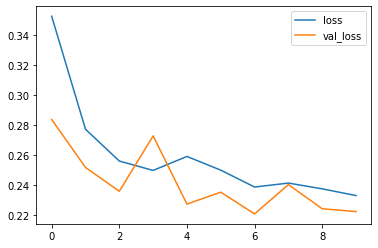

In [ ]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(b.history['loss'], label='loss')
plt.plot(b.history['val_loss'], label = 'val_loss')
plt.legend()

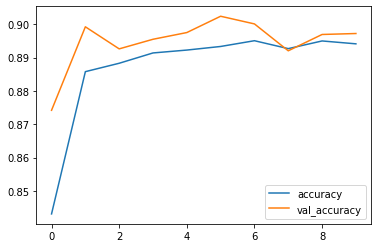

In [ ]:
# plotting the accuracy and validation accuracy of the model
plt.plot(b.history['accuracy'], label= 'accuracy')
plt.plot(b.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
(print(classification_report(y_test,rnn_pred,target_names=['real','fake'])))

              precision    recall  f1-score   support

        real       0.95      0.84      0.90       516
        fake       0.83      0.95      0.88       399

    accuracy                           0.89       915
   macro avg       0.89      0.90      0.89       915
weighted avg       0.90      0.89      0.89       915



In [ ]:
embedding_layer = Embedding(input_dim = vocab_length, 
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix], 
                                input_length=input_length,
                                trainable=False)
modelc = Sequential()
modelc.add(embedding_layer)
modelc.add(LSTM(128))
modelc.add(Dense(1, activation='sigmoid'))
modelc.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
modelc.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 200)          3048200   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,216,777
Trainable params: 168,577
Non-trainable params: 3,048,200
_________________________________________________________________


In [ ]:
c= modelc.fit(X_train, y_train, batch_size=64, epochs=10,callbacks=callbacks,verbose=1, validation_split=0.2)

Epoch 1/10
218/218 [==============================] - 11s 44ms/step - loss: 0.3559 - accuracy: 0.8313 - val_loss: 0.2630 - val_accuracy: 0.8823
Epoch 2/10
218/218 [==============================] - 9s 41ms/step - loss: 0.2606 - accuracy: 0.8861 - val_loss: 0.2566 - val_accuracy: 0.8785
Epoch 3/10
218/218 [==============================] - 9s 42ms/step - loss: 0.2423 - accuracy: 0.8911 - val_loss: 0.2242 - val_accuracy: 0.9007
Epoch 4/10
218/218 [==============================] - 9s 42ms/step - loss: 0.2338 - accuracy: 0.8955 - val_loss: 0.2195 - val_accuracy: 0.9021
Epoch 5/10
218/218 [==============================] - 9s 42ms/step - loss: 0.2278 - accuracy: 0.8978 - val_loss: 0.2151 - val_accuracy: 0.9007
Epoch 6/10
218/218 [==============================] - 9s 42ms/step - loss: 0.2302 - accuracy: 0.8958 - val_loss: 0.2173 - val_accuracy: 0.9018
Epoch 7/10
218/218 [==============================] - 9s 41ms/step - loss: 0.2215 - accuracy: 0.8990 - val_loss: 0.2194 - val_accuracy: 0.895

In [ ]:
lstm_pred=(modelc.predict(X_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,lstm_pred)
acc

0.9092896174863389

In [ ]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,lstm_pred)
con

array([[448,  68],
       [ 15, 384]])

In [ ]:
c.history

{'accuracy': [0.8313183784484863,
  0.8860823512077332,
  0.8911197185516357,
  0.8955094814300537,
  0.8978123068809509,
  0.8957973718643188,
  0.8990356922149658,
  0.9014104604721069,
  0.9011226296424866,
  0.9033535122871399],
 'loss': [0.3559442460536957,
  0.260619580745697,
  0.24225109815597534,
  0.2338377833366394,
  0.2278146743774414,
  0.2302086502313614,
  0.22151781618595123,
  0.21900542080402374,
  0.21553181111812592,
  0.212323859333992],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'val_accuracy': [0.8822682499885559,
  0.8785262107849121,
  0.9006908535957336,
  0.902130126953125,
  0.9006908535957336,
  0.9018422365188599,
  0.8952216506004333,
  0.9073114395141602,
  0.9052965044975281,
  0.9096142649650574],
 'val_loss': [0.2629900574684143,
  0.25658148527145386,
  0.22419103980064392,
  0.21945995092391968,
  0.2151063233613968,
  0.21734027564525604,
  0.21938969194889069,
  0.20602720975875854,
  0.20854637026786804,
  0.

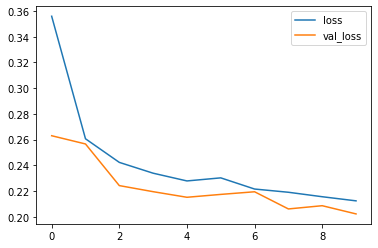

In [ ]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(c.history['loss'], label='loss')
plt.plot(c.history['val_loss'], label = 'val_loss')
plt.legend()

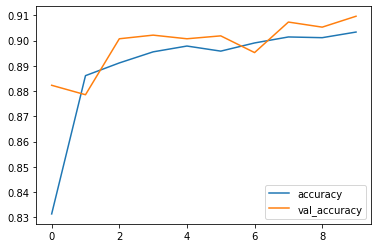

In [ ]:
# plotting the accuracy and validation accuracy of the model
plt.plot(c.history['accuracy'], label= 'accuracy')
plt.plot(c.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
print(print(classification_report(y_test,lstm_pred,target_names=['real','fake'])))

              precision    recall  f1-score   support

        real       0.97      0.87      0.92       516
        fake       0.85      0.96      0.90       399

    accuracy                           0.91       915
   macro avg       0.91      0.92      0.91       915
weighted avg       0.92      0.91      0.91       915

None


In [ ]:
embedding_layer = Embedding(input_dim = vocab_length, 
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix], 
                                input_length=input_length,
                                trainable=False)
modeld = Sequential()
modeld.add(embedding_layer)
modeld.add(LSTM(128,return_sequences=True))
modeld.add(LSTM(64,return_sequences=True))
modeld.add(LSTM(32))
modeld.add(Dense(1, activation='sigmoid'))
modeld.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
modeld.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 200)          3048200   
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 128)          168448    
_________________________________________________________________
lstm_3 (LSTM)                (None, 200, 64)           49408     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,278,505
Trainable params: 230,305
Non-trainable params: 3,048,200
_________________________________________________________________


In [ ]:
d = modeld.fit(X_train, y_train, batch_size=64, epochs=10,callbacks=callbacks,verbose=1, validation_split=0.2)

Epoch 1/10
218/218 [==============================] - 39s 159ms/step - loss: 0.4158 - accuracy: 0.7722 - val_loss: 0.3514 - val_accuracy: 0.8155
Epoch 2/10
218/218 [==============================] - 34s 154ms/step - loss: 0.2826 - accuracy: 0.8726 - val_loss: 0.2197 - val_accuracy: 0.8978
Epoch 3/10
218/218 [==============================] - 34s 155ms/step - loss: 0.2297 - accuracy: 0.8968 - val_loss: 0.2211 - val_accuracy: 0.9030
Epoch 4/10
218/218 [==============================] - 34s 154ms/step - loss: 0.2227 - accuracy: 0.8996 - val_loss: 0.2058 - val_accuracy: 0.9085
Epoch 5/10
218/218 [==============================] - 33s 153ms/step - loss: 0.2168 - accuracy: 0.8991 - val_loss: 0.1980 - val_accuracy: 0.9102
Epoch 6/10
218/218 [==============================] - 33s 152ms/step - loss: 0.2171 - accuracy: 0.8985 - val_loss: 0.2052 - val_accuracy: 0.9039
Epoch 7/10
218/218 [==============================] - 34s 155ms/step - loss: 0.2106 - accuracy: 0.9020 - val_loss: 0.1989 - val_ac

In [ ]:
st_pred=(modeld.predict(X_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,st_pred)
acc

0.8994535519125683

In [ ]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,st_pred)
con

array([[424,  92],
       [  0, 399]])

In [ ]:
d.history

{'accuracy': [0.7721646428108215,
  0.8725532293319702,
  0.8968048095703125,
  0.8996114134788513,
  0.8991076350212097,
  0.8984599709510803,
  0.9019861817359924,
  0.9035694003105164,
  0.9043609499931335,
  0.9027057886123657],
 'loss': [0.4158207178115845,
  0.2825968861579895,
  0.2296893149614334,
  0.22268231213092804,
  0.21681010723114014,
  0.21714304387569427,
  0.21064485609531403,
  0.20757192373275757,
  0.2053099274635315,
  0.20463046431541443],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'val_accuracy': [0.815486490726471,
  0.8978123068809509,
  0.9029936790466309,
  0.9084628820419312,
  0.9101899862289429,
  0.9038572311401367,
  0.9052965044975281,
  0.9136441946029663,
  0.9153713583946228,
  0.902130126953125],
 'val_loss': [0.3513953685760498,
  0.21965129673480988,
  0.22110013663768768,
  0.20583854615688324,
  0.19796963036060333,
  0.205162912607193,
  0.1989048421382904,
  0.2081068903207779,
  0.19295333325862885,
  0.

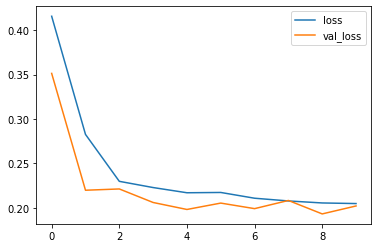

In [ ]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(d.history['loss'], label='loss')
plt.plot(d.history['val_loss'], label = 'val_loss')
plt.legend()

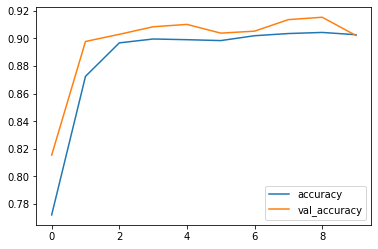

In [ ]:
# plotting the accuracy and validation accuracy of the model
plt.plot(d.history['accuracy'], label= 'accuracy')
plt.plot(d.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
print(print(classification_report(y_test,st_pred,target_names=['real','fake'])))

              precision    recall  f1-score   support

        real       1.00      0.82      0.90       516
        fake       0.81      1.00      0.90       399

    accuracy                           0.90       915
   macro avg       0.91      0.91      0.90       915
weighted avg       0.92      0.90      0.90       915

None


In [ ]:
from sklearn.metrics import roc_curve

bi_fpr, bi_tpr, threshold = roc_curve(y_test, bi_pred)
rnn_fpr, rnn_tpr, threshold = roc_curve(y_test, rnn_pred)
lstm_fpr, lstm_tpr, thresold = roc_curve(y_test, lstm_pred)
st_fpr, st_tpr, threshold = roc_curve(y_test, st_pred)

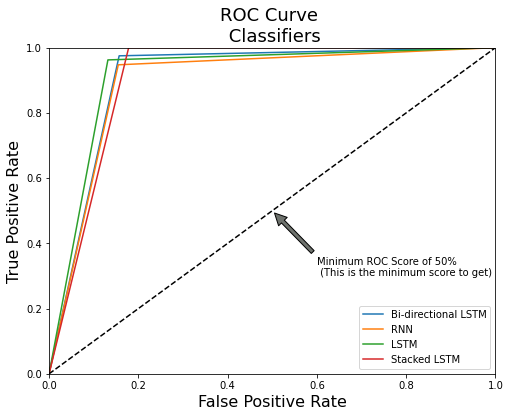

In [ ]:
import matplotlib.pyplot as plt
def graph_roc_curve_multiple(bi_fpr, bi_tpr, rnn_fpr, rnn_tpr, lstm_fpr , lstm_tpr, st_fpr, st_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(bi_fpr, bi_tpr, label='Bi-directional LSTM')
    plt.plot(rnn_fpr, rnn_tpr, label='RNN')
    plt.plot(lstm_fpr , lstm_tpr, label='LSTM')
    plt.plot(st_fpr, st_tpr, label='Stacked LSTM')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(bi_fpr, bi_tpr, rnn_fpr, rnn_tpr, lstm_fpr, lstm_tpr, st_fpr, st_tpr)
plt.show()